<a href="https://colab.research.google.com/github/BlinkovYevhenGit/CE888_Repository/blob/main/Lab8/Lab8_Transfer_Learning(Feature%20Extraction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile
file_name = "https://github.com/sagihaider/CE888_2021/blob/main/Lab_8/data.zip?raw=true"
with urlopen(file_name) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall()
        print('done')

done


In [4]:
base_dir = '/content/data/4_class_data'
# os.mkdir(base_dir)

In [5]:
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

In [6]:
train_dir

'/content/data/4_class_data/train'

In [7]:
path, dirs, files = next(os.walk(validation_dir))
file_count = len(files)
print(file_count)

108


In [8]:
path, dirs, files = next(os.walk("/content/data/cats"))
file_count = len(files)
print(file_count)

202


In [9]:
path, dirs, files = next(os.walk("/content/data/dogs"))
file_count = len(files)
print(file_count)

202


In [10]:
path, dirs, files = next(os.walk("/content/data/horses"))
file_count = len(files)
print(file_count)

202


In [11]:
import shutil
fnames = ['rider-{}.jpg'.format(i) for i in range(1,151)]
for fname in fnames:
    src = os.path.join("/content/data/Humans", fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['rider-{}.jpg'.format(i) for i in range(151, 178)]
for fname in fnames:
    src = os.path.join("/content/data/Humans", fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(178, 203)]
for fname in fnames:
    src = os.path.join("/content/data/Humans", fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
    


fnames = ['cat.{}.jpg'.format(i) for i in range(1,151)]
for fname in fnames:
    src = os.path.join("/content/data/cats", fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(151, 178)]
for fname in fnames:
    src = os.path.join("/content/data/cats", fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(178, 203)]
for fname in fnames:
    src = os.path.join("/content/data/cats", fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)



fnames = ['dog.{}.jpg'.format(i) for i in range(1,151)]
for fname in fnames:
    src = os.path.join("/content/data/dogs", fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(151, 178)]
for fname in fnames:
    src = os.path.join("/content/data/dogs", fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(178, 203)]
for fname in fnames:
    src = os.path.join("/content/data/dogs", fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)


fnames = ['horse-{}.jpg'.format(i) for i in range(1,151)]
for fname in fnames:
    src = os.path.join("/content/data/horses", fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['horse-{}.jpg'.format(i) for i in range(151, 178)]
for fname in fnames:
    src = os.path.join("/content/data/horses", fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(178, 203)]
for fname in fnames:
    src = os.path.join("/content/data/horses", fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
    
       

In [12]:
import cv2
import re
import numpy as np
from random import shuffle

IMG_SIZE = 299
LR = 1e-4

In [13]:
def label_img(img):
    word_label = re.sub("[.-]"," ",img).split()[0]
    if word_label == 'rider': return 0
    elif word_label == 'cat': return 1
    elif word_label == 'dog': return 2
    elif word_label == 'horse': return 3
    return None

In [14]:
def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)
        
    return np.array(X), np.array(y)

In [15]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)
print(train_X.shape)
print(val_X.shape)
print(test_X.shape)

(600, 299, 299, 3)
(108, 299, 299, 3)
(100, 299, 299, 3)


In [37]:
## Xception

from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Activation, GlobalAveragePooling2D,Dense, Input
from tensorflow.keras import Model
import tensorflow as tf

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [23]:
img_input

<KerasTensor: shape=(None, 299, 299, 3) dtype=float32 (created by layer 'input_3')>

In [30]:
model = Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [31]:
last_layer = model.get_layer('avg_pool').output
out = Dense(4, activation='softmax', name='predictions')(last_layer)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [32]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['acc'])

In [33]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='Xception_model.h5', save_best_only=True),
]

In [34]:
history = model.fit(train_X, train_y,
                              batch_size=10,
                              epochs=5, 
                              validation_data=(val_X, val_y),
                              callbacks=my_callbacks)

Epoch 1/5
60/60 [==============================] - 218s 4s/step - loss: 0.8330 - acc: 0.7209 - val_loss: 0.2294 - val_acc: 0.9630
Epoch 2/5
60/60 [==============================] - 208s 3s/step - loss: 0.1732 - acc: 0.9625 - val_loss: 0.1391 - val_acc: 0.9722
Epoch 3/5
60/60 [==============================] - 206s 3s/step - loss: 0.1055 - acc: 0.9873 - val_loss: 0.1113 - val_acc: 0.9722
Epoch 4/5
60/60 [==============================] - 205s 3s/step - loss: 0.0749 - acc: 0.9897 - val_loss: 0.0914 - val_acc: 0.9815
Epoch 5/5
60/60 [==============================] - 202s 3s/step - loss: 0.0657 - acc: 0.9798 - val_loss: 0.0784 - val_acc: 0.9907


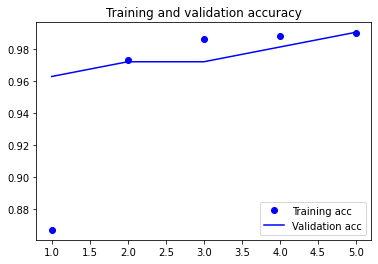

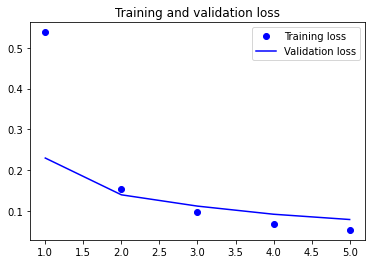

In [35]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [36]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)
output = { 0:'rider',1:'cat',2:'dog',3:'horse'}

predictions = [output[np.argmax(pred)] for pred in predictions]
test_y=[output[y] for y in test_y]

test_acc = accuracy_score(test_y, predictions)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, predictions, average='macro')

# auc = roc_auc_score(test_y, predictions,)
print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
# print("AUC:\t\t", auc)

Train Accuracy:	 0.9900000095367432
Val Accuracy:	 0.9907407164573669
Test Accuracy:	 0.99
Precision:	 0.9903846153846154
Recall:		 0.99
F1 Score:	 0.9899959983993598
